In [1]:
%matplotlib inline

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
wholedf = pd.read_csv('Weather_At_Barre_Montpelier_Knapp_State_Airport_VT_US_1948_-_2015.csv')

In [3]:
wholedf.tail()
wholedf['Date'] = pd.to_datetime(wholedf['Date'])

In [19]:
wholedf['Mean Temp F'] = (wholedf['Min Temp F'] + wholedf['Max Temp F']) / 2
wholedf['Diff Temp F'] = wholedf['Max Temp F'] - wholedf['Min Temp F']
wholedf.tail()

,Date,Percipitation in.,Snow Depth in.,Snowfall in.,Max Temp F,Min Temp F,Ave Wind Spd mph,FOG,Sleet,Smoke/Haze,Thunder,Ave Temp F,month,day,year,Mean Temp F,Diff Temp F
24466,2015-06-16,0.41,0.0,0.0,71.06,53.96,7.16,True,False,False,False,62.51,6,16,2015,62.51,17.10
24467,2015-06-17,0.00,0.0,0.0,73.04,46.94,2.46,False,False,False,False,59.99,6,17,2015,59.99,26.10
24468,2015-06-18,0.17,0.0,0.0,75.92,48.92,5.37,True,False,False,False,62.42,6,18,2015,62.42,27.00
24469,2015-06-19,0.66,0.0,0.0,66.02,42.98,6.93,True,False,True,False,54.50,6,19,2015,54.50,23.04
24470,2015-06-20,0.13,0.0,0.0,75.02,39.92,8.05,True,False,False,False,57.47,6,20,2015,57.47,35.10


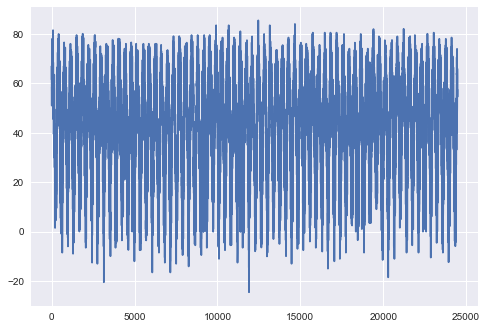

In [36]:
#plt.plot(wholedf['Max Temp F'])
#plt.plot(wholedf['Min Temp F'])
plt.plot(wholedf['Mean Temp F'])
plt.show()

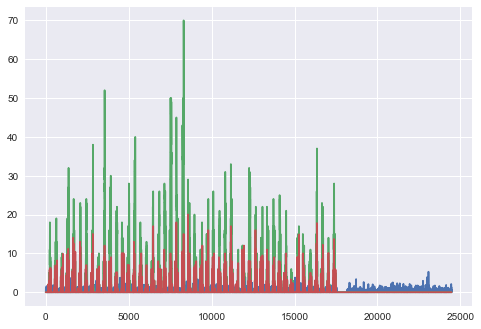

In [37]:
plt.plot(wholedf['Percipitation in.'])
plt.plot(wholedf['Snow Depth in.'])
plt.plot(wholedf['Snowfall in.'])
plt.show()

(-40, 98.500646912037325)

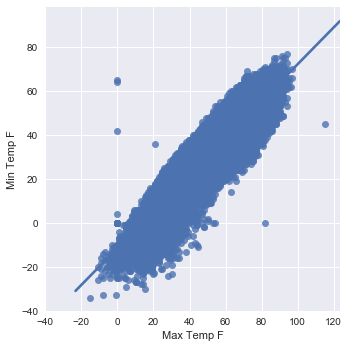

In [32]:
sns.lmplot(x='Max Temp F', y='Min Temp F', data=wholedf)
plt.xlim(-40,)
plt.ylim(-40,)

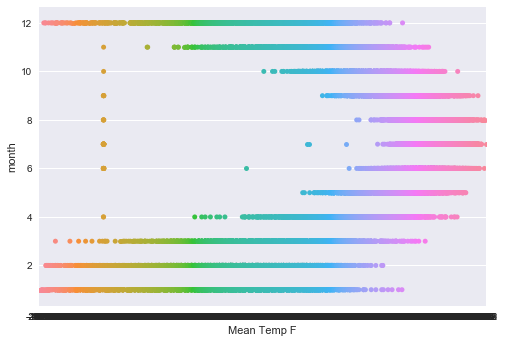

In [33]:
sns.swarmplot(x='Mean Temp F', y='month', data=wholedf)

In [9]:
wholedf['month'] = wholedf['Date'].dt.month
wholedf['day'] = wholedf['Date'].dt.day
wholedf['year'] = wholedf['Date'].dt.year
wholedf.head()

,Date,Percipitation in.,Snow Depth in.,Snowfall in.,Max Temp F,Min Temp F,Ave Wind Spd mph,FOG,Sleet,Smoke/Haze,Thunder,Ave Temp F,month,day,year
0,1948-06-01,0.00,0.0,0.0,80.06,42.98,NaN,False,False,False,False,61.52,6,1,1948
1,1948-06-02,0.00,0.0,0.0,78.98,48.02,NaN,False,False,False,False,63.50,6,2,1948
2,1948-06-03,0.00,0.0,0.0,82.04,48.02,NaN,False,False,False,False,65.03,6,3,1948
3,1948-06-04,0.00,0.0,0.0,84.02,50.00,NaN,False,False,False,False,67.01,6,4,1948
4,1948-06-05,0.15,0.0,0.0,62.06,48.92,NaN,False,False,False,False,55.49,6,5,1948


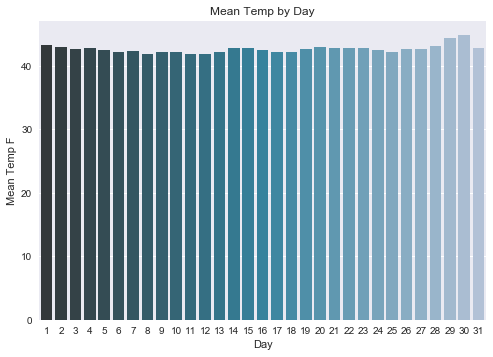

In [10]:
daydf = wholedf[['Ave Temp F']].groupby(wholedf['day'], as_index=False).mean()
daydf['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
daydf.columns = ['Count','Day']

sns.barplot(x='Day', y="Count", data=daydf, palette="PuBuGn_d")
plt.title("Mean Temp by Day")
plt.xlabel("Day")
plt.ylabel("Mean Temp F")
plt.show()

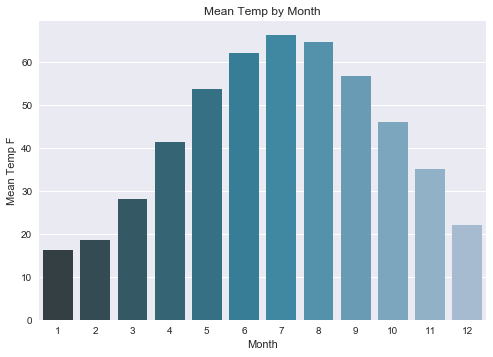

In [42]:
daydf = wholedf[['Ave Temp F']].groupby(wholedf['month'], as_index=False).mean()
daydf['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
daydf.columns = ['Count','Month']

sns.barplot(x='Month', y="Count", data=daydf, palette="PuBuGn_d")
plt.title("Mean Temp by Month")
plt.xlabel("Month")
plt.ylabel("Mean Temp F")
plt.show()

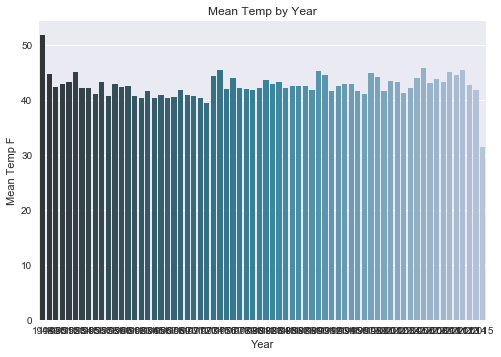

In [12]:
daydf = wholedf[['year','Ave Temp F']].groupby(wholedf['year'], as_index=False).mean()

sns.barplot(x='year', y="Ave Temp F", data=daydf, palette="PuBuGn_d")
plt.title("Mean Temp by Year")
plt.xlabel("Year")
plt.ylabel("Mean Temp F")
plt.show()

In [13]:
daydf = wholedf[['year','Ave Temp F']].groupby(wholedf['year'], as_index=False).mean()
#daydf['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12]
#daydf.columns = ['Count','Day']
daydf

,year,Ave Temp F
0,1948,51.887056
1,1949,44.872959
2,1950,42.386000
3,1951,42.888027
4,1952,43.249508
5,1953,45.215205
6,1954,42.170740
7,1955,42.183388
8,1956,41.229672
9,1957,43.355041


In [14]:
sns.lmplot(x='', y='', data=wholedf)

KeyError: "[''] not in index"